In [1]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np,numpy  
import cv2
import sys
import tensorflow as tf
np.set_printoptions(threshold=np.inf)#print全部信息

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
#对图片进行face_mask预处理
img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
rows,cols,channels = img.shape
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
black=np.array([0,0,0])
mask = cv2.inRange(hsv,black,black)#将黑色全部标记出来，输出成灰度图
coordinates=[]
for j in range(rows):
    for k in range(cols):
        if(mask[j,k]==0):
            coordinates.append((j,k))
coordinates=np.array(coordinates)#存放mask在图片中的坐标

#标准化
img_dataset=[]
for i in range(1,597):
    img = cv2.imread("/home/fengchao/桌面/facedata/78points_shapefree/"+str(i)+".jpg")
    new_img=[]
    for j in range(rows):
        for k in range(cols):
                if(mask[j,k]==0):
                    new_img.append((img[j,k,0],img[j,k,1],img[j,k,2]))
    img=np.array(new_img)#shape (49367, 3)

#以每张图片计算均值和标准差
    aver_img=np.mean(img,axis=0)
    std_img=np.std(img,axis=0)
    img=(img-aver_img)/std_img
#     img=img*0.18+0.35
    img_dataset.append(img)
    
# #     for i in range(0,len(img_dataset)):
# #         for j in range(480):
# #             for k in range(360):
# #                 for m in range(3):
# #                     if (img_dataset[i][j][k][m]>1):
# #                         print(img_dataset[i][j][k][m])

In [3]:
img_dataset=np.reshape(np.array(img_dataset),(596,np.array(img_dataset).shape[1]*np.array(img_dataset).shape[2]))
pca=PCA(n_components=50,svd_solver="full")
pca.fit(img_dataset)
print("explained_variance_ratio",pca.explained_variance_ratio_)
print("components_.shape",pca.components_.shape)
print("explained_variance",pca.explained_variance_)
print("singular_values",pca.singular_values_)

explained_variance_ratio [0.18607432 0.1081975  0.07190735 0.05819026 0.03480489 0.02809179
 0.02454142 0.01974257 0.01878001 0.01667473 0.01450621 0.01365835
 0.01274504 0.01257817 0.01131064 0.01033549 0.00949116 0.00835128
 0.00772119 0.00734048 0.00709007 0.00634301 0.00610803 0.00594448
 0.00539568 0.00525992 0.00501782 0.00489121 0.00459663 0.00447708
 0.0043482  0.00427293 0.00412419 0.00396781 0.0038175  0.00368683
 0.00358918 0.0035464  0.00334828 0.00321683 0.00314526 0.00308845
 0.00300251 0.00285827 0.00280093 0.00271589 0.00268019 0.00259718
 0.00246632 0.00242902]
components_.shape (50, 148062)
explained_variance [4352.51450833 2530.87670514 1682.00404461 1361.14407363  814.13055869
  657.10262244  574.05496393  461.80366549  439.28825222  390.04310428
  339.31870859  319.48603442  298.12276045  294.21940445  264.57012216
  241.76018869  222.01017961  195.34703781  180.6083872   171.70305145
  165.84576463  148.37096901  142.87455629  139.04902853  126.21185011
  123.0362

In [4]:
pca_points=pca.components_
# print(pca_points.shape)
pc1=pca_points[0,:]
pc2=pca_points[1,:]
pc3=pca_points[2,:]
pc4=pca_points[3,:]
pc5=pca_points[4,:]
pc6=pca_points[5,:]
pc7=pca_points[6,:]
pc8=pca_points[7,:]
pc9=pca_points[8,:]
pc10=pca_points[9,:]

# for i in range (len(pc7)):
#     if (i>0):
#         ed=ed+np.square(pc2[i])
#     else:
#         ed= np.square(pc2[i])
# print(np.sqrt(ed))
    
# for i in range(10):
#     print(pca_points[i,:])

In [5]:
pc1=4*pc1*np.sqrt(pca.explained_variance_[0])
pc2=4*pc2*np.sqrt(pca.explained_variance_[1])
pc3=4*pc3*np.sqrt(pca.explained_variance_[2])
pc4=4*pc4*np.sqrt(pca.explained_variance_[3])
pc5=4*pc5*np.sqrt(pca.explained_variance_[4])
pc6=4*pc6*np.sqrt(pca.explained_variance_[5])
pc7=4*pc7*np.sqrt(pca.explained_variance_[6])
pc8=4*pc8*np.sqrt(pca.explained_variance_[7])
pc9=4*pc9*np.sqrt(pca.explained_variance_[8])
pc10=4*pc10*np.sqrt(pca.explained_variance_[9])

pc=np.zeros((480,360,3))
# pc1=np.reshape(pc1,(len(coordinates),3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc1[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc1[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc1[index]
    index=index+1
pc1=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc2[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc2[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc2[index]
    index=index+1
pc2=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc3[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc3[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc3[index]
    index=index+1
pc3=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc4[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc4[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc4[index]
    index=index+1
pc4=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc5[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc5[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc5[index]
    index=index+1
pc5=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc6[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc6[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc6[index]
    index=index+1
pc6=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc7[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc7[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc7[index]
    index=index+1
pc7=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc8[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc8[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc8[index]
    index=index+1
pc8=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc9[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc9[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc9[index]
    index=index+1
pc9=pc

pc=np.zeros((480,360,3))
index=0
for i in range(len(coordinates)):
    pc[coordinates[i,0],coordinates[i,1],0]=pc10[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],1]=pc10[index]
    index=index+1
    pc[coordinates[i,0],coordinates[i,1],2]=pc10[index]
    index=index+1
pc10=pc

In [6]:
##Tensorflow 标准化
# img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
# std_img=tf.image.per_image_standardization(img)
# with tf.Session() as sess:
#     ave_face=sess.run(std_img)
  
#手动标准化
img = cv2.imread("/home/fengchao/桌面/facedata/average_face.jpg")
img=np.reshape(img,(172800,3))
# np.savetxt("/home/fengchao/桌面/img.txt",img)
aver=np.mean(img,axis=0)
std=np.std(img,axis=0)
img=np.reshape(img,(480,360,3))
ave_face=(img-aver)/std

i=(ave_face+pc1)*std+aver
j=(ave_face-pc1)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)

cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc1',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc1',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc1.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc1.jpg",np.uint8(j))

i=(ave_face+pc2)*std+aver
j=(ave_face-pc2)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc2',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc2',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc2.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc2.jpg",np.uint8(j))

i=(ave_face+pc3)*std+aver
j=(ave_face-pc3)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc3',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc3',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc3.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc3.jpg",np.uint8(j))

i=(ave_face+pc4)*std+aver
j=(ave_face-pc4)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc4',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc4',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc4.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc4.jpg",np.uint8(j))

i=(ave_face+pc5)*std+aver
j=(ave_face-pc5)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc5',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc5',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc5.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc5.jpg",np.uint8(j))
# cv2.imshow('average face',ave_face)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()
# pc1p=ave_face-pc1
# cv2.imshow('pca1-3sd',pc1p)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

In [7]:
i=(ave_face+pc6)*std+aver
j=(ave_face-pc6)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc6',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc6',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc6.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc6.jpg",np.uint8(j))


i=(ave_face+pc7)*std+aver
j=(ave_face-pc7)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc7',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc7',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc7.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc7.jpg",np.uint8(j))


i=(ave_face+pc8)*std+aver
j=(ave_face-pc8)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)           
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc8',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc8',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc8.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc8.jpg",np.uint8(j))

i=(ave_face+pc9)*std+aver
j=(ave_face-pc9)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc9',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc9',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc9.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc9.jpg",np.uint8(j))

i=(ave_face+pc10)*std+aver
j=(ave_face-pc10)*std+aver

for h in range(i.shape[0]):
    for w in range(i.shape[1]):
        for c in range(i.shape[2]):
            if(i.item(h,w,c)<0):
                i.itemset((h,w,c),0)
            if(i.item(h,w,c)>255):
                i.itemset((h,w,c),255)
                
for h in range(j.shape[0]):
    for w in range(j.shape[1]):
        for c in range(j.shape[2]):
            if(j.item(h,w,c)<0):
                j.itemset((h,w,c),0)
            if(j.item(h,w,c)>255):
                j.itemset((h,w,c),255)
                
cv2.imshow('average face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face + pc10',np.uint8(i))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('average face - pc10',np.uint8(j))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("/home/fengchao/桌面/averageface+pc10.jpg",np.uint8(i))
cv2.imwrite("/home/fengchao/桌面/averageface-pc10.jpg",np.uint8(j))

True

In [33]:
def plot_gallery(images, titles,n_row=5, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
#         cv2.imshow('average face',images[i])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

In [34]:
plot_imgs=[]
plot_imgs.append(ave_face+pc1)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc1)
plot_imgs.append(ave_face+pc2)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc2)
plot_imgs.append(ave_face+pc3)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc3)
plot_imgs.append(ave_face+pc4)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc4)
plot_imgs.append(ave_face+pc5)
plot_imgs.append(ave_face)
plot_imgs.append(ave_face-pc5)
plot_imgs=np.array(plot_imgs)
plot_titles=[]
plot_titles.append("ave_face+pc1")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc1")
plot_titles.append("ave_face+pc2")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc2")
plot_titles.append("ave_face+pc3")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc3")
plot_titles.append("ave_face+pc4")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc4")
plot_titles.append("ave_face+pc5")
plot_titles.append("ave_face")
plot_titles.append("ave_face-pc5")
plot_titles=np.array(plot_titles)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

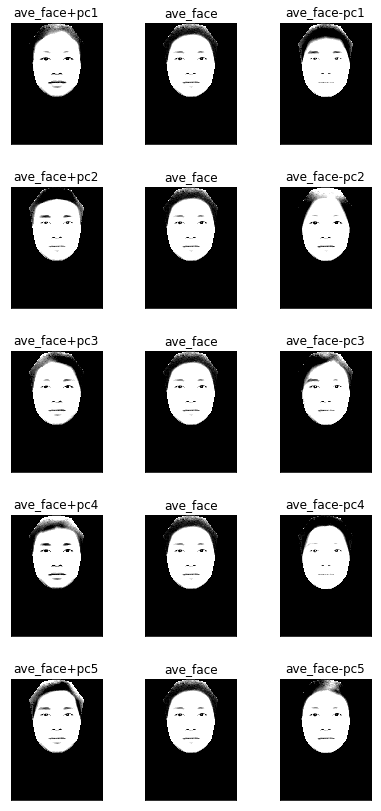

In [35]:
plot_gallery(plot_imgs,plot_titles)